In [1]:
import pandas as pd
import numpy as np
vimana_df =pd.read_excel(r"D:/Vimana_D15.xlsx")

In [2]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 724.0 bytes


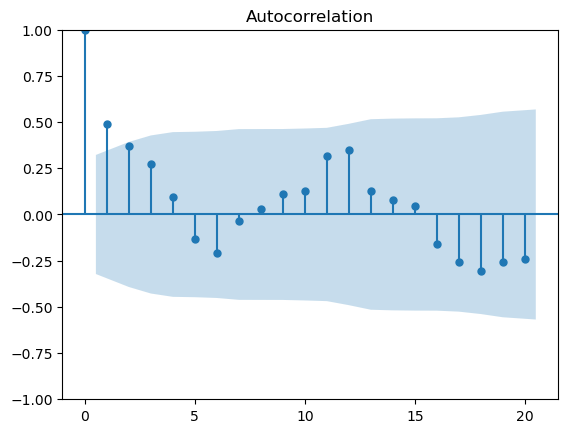

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_plot = plot_acf(vimana_df.demand,lags =20)

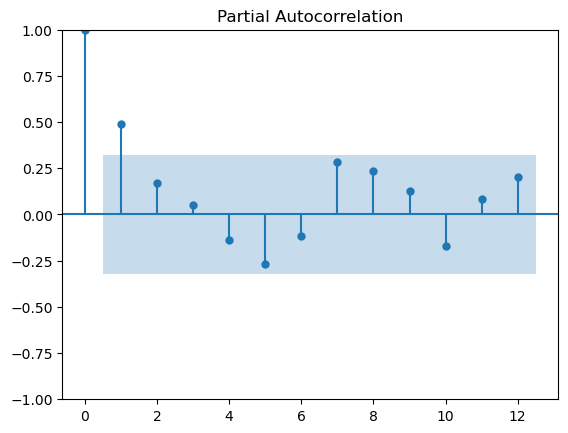

In [4]:
pacf_plot = plot_pacf(vimana_df.demand,lags =12)

In [5]:
#ARIMA
vimana_df =pd.read_excel(r"D:/Vimana_D15.xlsx",names=['value'],header = 0)
import statsmodels.api as sm 
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(vimana_df.value,order=(1,1,2))
model =arima.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   37
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -221.189
Date:                Sat, 12 Oct 2024   AIC                            450.378
Time:                        19:18:10   BIC                            456.713
Sample:                             0   HQIC                           452.589
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6225      0.631      0.987      0.324      -0.614       1.859
ma.L1         -1.1658      0.805     -1.448      0.147      -2.743       0.412
ma.L2          0.2407      0.670      0.359      0.7

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
import numpy as np
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted) / actual)))

In [12]:
#Forecast and Accuracy
forecast_31_37 = model.predict(30,36)
forecast_31_37
get_mape(vimana_df.value[30],forecast_31_37)

0.0